In [3]:
import pandas as pd 

data_path = "data/ml-100k/ml-100k/u.data"
item_info_path = "data/ml-100k/ml-100k/u.item"

column_names = ['user_id', 'item_id', 'rating', 'timestamp']
ratings_df_100k = pd.read_csv(data_path, sep='\t', names=column_names)

item_column_names = ['movie_id', 'movie_title', 'release_date', 'video_release_date',
                     'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
                     'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                     'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
                     'Thriller', 'War', 'Western']

movies_df_100k = pd.read_csv(item_info_path, sep='|', names=item_column_names, encoding='latin-1')

# Merge ratings and movies info dataframes
ratings_df_100k = pd.merge(ratings_df_100k, movies_df_100k[['movie_id', 'movie_title']], 
                           left_on='item_id', right_on='movie_id', how='inner')

ratings_df_100k.rename(columns={'movie_id' : 'item_id'}, inplace=True)

print("MovieLens Ratings Data (100K):")
print(ratings_df_100k.head())

print("MovieLens Movies Data (100K):")
print(movies_df_100k.head())

MovieLens Ratings Data (100K):
   user_id  item_id  rating  timestamp  item_id                 movie_title
0      196      242       3  881250949      242                Kolya (1996)
1      186      302       3  891717742      302    L.A. Confidential (1997)
2       22      377       1  878887116      377         Heavyweights (1994)
3      244       51       2  880606923       51  Legends of the Fall (1994)
4      166      346       1  886397596      346         Jackie Brown (1997)
MovieLens Movies Data (100K):
   movie_id        movie_title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http


Number of movies per genre

Drama          725
Comedy         505
Action         251
Thriller       251
Romance        247
Adventure      135
Children's     122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
unknown          2
dtype: int64


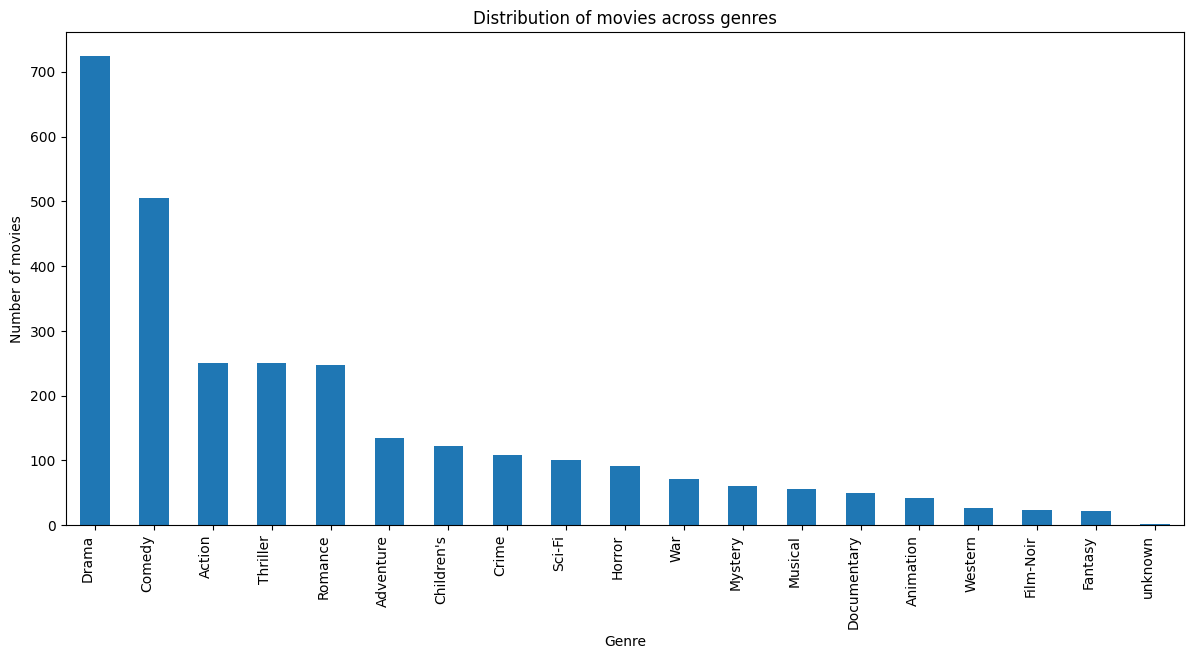

In [4]:
# Number of movies per genre 
genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
genre_counts = movies_df_100k[genre_columns].sum().sort_values(ascending=False)

print("\nNumber of movies per genre\n")
print(genre_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.title('Distribution of movies across genres')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
genre_counts.plot(kind='bar')
plt.show()


In [5]:
# Stastistical Info
ratings_df_100k.describe()

,user_id,item_id,rating,timestamp,item_id
count,100000.00000,100000.000000,100000.000000,1.000000e+05,100000.000000
mean,462.48475,425.530130,3.529860,8.835289e+08,425.530130
std,266.61442,330.798356,1.125674,5.343856e+06,330.798356
min,1.00000,1.000000,1.000000,8.747247e+08,1.000000
25%,254.00000,175.000000,3.000000,8.794487e+08,175.000000
50%,447.00000,322.000000,4.000000,8.828269e+08,322.000000
75%,682.00000,631.000000,4.000000,8.882600e+08,631.000000
max,943.00000,1682.000000,5.000000,8.932866e+08,1682.000000


In [6]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(ratings_df_100k, test_size=0.2, random_state=42)

print(f"Shape of training data: {train_data.shape}")
print(f"Shape of testing data: {test_data.shape}")


Shape of training data: (80000, 6)
Shape of testing data: (20000, 6)


In [7]:
# Create Item-User Ratings Matrix for Training Data
item_user_ratings_train = train_data.pivot_table(index='movie_title', columns='user_id', values='rating')

# Ensure indices are integers (user IDs)
item_user_ratings_train.columns = item_user_ratings_train.columns.astype(int)

print(f"Item-User Ratings Matrix (Training data - first 5 rows and columns):")
print(item_user_ratings_train.head().iloc[:, :5])

Item-User Ratings Matrix (Training data - first 5 rows and columns):
user_id                      1   2    3   4    5
movie_title                                     
'Til There Was You (1997)  NaN NaN  NaN NaN  NaN
1-900 (1994)               NaN NaN  NaN NaN  NaN
101 Dalmatians (1996)      2.0 NaN  NaN NaN  2.0
12 Angry Men (1957)        5.0 NaN  NaN NaN  NaN
187 (1997)                 NaN NaN  2.0 NaN  NaN


In [8]:
# Create Item-User Ratings Matrix for Training Data
item_user_ratings_train = train_data.pivot_table(index='movie_title', columns='user_id', values='rating')

# Ensure indices are integers (user IDs)
item_user_ratings_train.columns = item_user_ratings_train.columns.astype(int)

print(f"Item-User Ratings Matrix (Training data - first 5 rows and columns):")
print(item_user_ratings_train.head().iloc[:, :5])

Item-User Ratings Matrix (Training data - first 5 rows and columns):
user_id                      1   2    3   4    5
movie_title                                     
'Til There Was You (1997)  NaN NaN  NaN NaN  NaN
1-900 (1994)               NaN NaN  NaN NaN  NaN
101 Dalmatians (1996)      2.0 NaN  NaN NaN  2.0
12 Angry Men (1957)        5.0 NaN  NaN NaN  NaN
187 (1997)                 NaN NaN  2.0 NaN  NaN


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# Fill na values with 0
item_user_ratings_train_filled = item_user_ratings_train.fillna(0)

# Calculate cosine similarity between movies 
item_similarity = cosine_similarity(item_user_ratings_train_filled) 
item_similarity_df = pd.DataFrame(item_similarity, index=item_user_ratings_train.index, columns=item_user_ratings_train.index)

print("\nItem Similarity Matrix (Training Data - first 5 rows and columns):")
print(item_similarity_df.head().iloc[:, :5])


Item Similarity Matrix (Training Data - first 5 rows and columns):
movie_title                'Til There Was You (1997)  1-900 (1994)  \
movie_title                                                          
'Til There Was You (1997)                   1.000000      0.000000   
1-900 (1994)                                0.000000      1.000000   
101 Dalmatians (1996)                       0.028474      0.000000   
12 Angry Men (1957)                         0.046393      0.012195   
187 (1997)                                  0.203295      0.000000   

movie_title                101 Dalmatians (1996)  12 Angry Men (1957)  \
movie_title                                                             
'Til There Was You (1997)               0.028474             0.046393   
1-900 (1994)                            0.000000             0.012195   
101 Dalmatians (1996)                   1.000000             0.087009   
12 Angry Men (1957)                     0.087009             1.000000   
187

In [10]:
import pandas as pd 

similarity_scores = []

for col in item_similarity_df.columns: 
    scores = item_similarity_df[col].values
    scores = scores[item_similarity_df.index != col]
    similarity_scores.extend(scores) 

if similarity_scores:
    min_similarity = min(similarity_scores)
    max_similarity = max(similarity_scores)
    print(f"Minimum similarity score: {min_similarity}")
    print(f"Maximum similarity score: {max_similarity}")
else:
    print("No similarity scores found (or only self-similarities).")

Minimum similarity score: 0.0
Maximum similarity score: 1.0


In [11]:
print("Index of item_similarity_df:")
print(item_similarity_df.index)
print("\nIndex (movie titles) of item_user_ratings_train:")
print(item_user_ratings_train.index)

Index of item_similarity_df:
Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)',
       ...
       'Yankee Zulu (1994)', 'Year of the Horse (1997)', 'You So Crazy (1994)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
       'Zeus and Roxanne (1997)', 'unknown',
       'Á köldum klaka (Cold Fever) (1994)'],
      dtype='object', name='movie_title', length=1635)

Index (movie titles) of item_user_ratings_train:
Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '3 Ninjas:

In [29]:
def get_item_based_recommendations(user_id, item_similarity_df, user_movie_ratings_train, top_n=5, num_similar_items=20):
    """
    Generates item-based movie recommendations for a given user.

    Args:
        user_id (int): The ID of the user to get recommendations for.
        item_similarity_df (pd.DataFrame): DataFrame of item (movie) similarities.
        user_movie_ratings_train (pd.DataFrame): DataFrame of user-movie ratings from training data.
        top_n (int): The number of top recommendations to return.

    Returns:
        pd.Series: A Series of top N recommended movies with their scores.
    """
    if(user_id not in user_movie_ratings_train):
        return pd.Series()

    # Get movies rated by the user 
    user_ratings = user_movie_ratings_train[user_id].dropna() 
    recommendations = {} 

    # Iterate through movies rated by the user 
    for movie, rating in user_ratings.items():
        # Check if the movie is in the similarity matrix index
        if movie in item_similarity_df.index: 
            # Get similarity scores for the current movie 
            similar_movies = item_similarity_df[movie].sort_values(ascending=False).head(num_similar_items)
        
            # Iterate through similar movies 
            for similar_movie, similarity_score in similar_movies.items(): 
                # Debug printer for user ID 1
                # if user_id == 1: 
                #     print(f"Similarity between '{movie}' and {similar_movie}: {similarity_score}, Rating of '{movie}' by user 1: {rating}")
                    
                # Only consider the movies that the user hasn't rated yet 
                if similar_movie not in user_ratings and similar_movie != movie: 
                    recommendations[similar_movie] = recommendations.get(similar_movie, 0) + rating * similarity_score
                # elif similar_movie in user_ratings and similar_movie != movie and user_id == 1: 
                #     print(f"User 1 has already rated '{similar_movie}'.")
        # else: 
        #     print(f"Movie '{movie}' has not been found in item similarity matrix index.")
                

    # Sort the recommendations by score in descending order
    if recommendations: 
        ranked_recommendations = pd.Series(recommendations).sort_values(ascending=False)
        return ranked_recommendations.head(top_n) 
    else: 
        return pd.Series()

In [27]:
def evaluate_precision_at_item_k(test_data, item_similarity_df, user_movie_ratings_train, k=5, num_similar_items=20): 
    """
    Evaluates the precision@k of the item-based collaborative filtering model.

    Args:
        test_data (pd.DataFrame): The testing dataset.
        item_similarity_df (pd.DataFrame): The item similarity matrix (trained on training data).
        user_movie_ratings_train (pd.DataFrame): The user-movie ratings matrix (trained on training data).
        k (int): The number of top recommendations to consider.

    Returns:
        float: The average precision@k across all users in the test set.
    """
    precision_sum = 0
    user_count = 0
    test_user_ids = test_data['user_id'].unique() 

    for user_id in test_user_ids: 
        if user_id in user_movie_ratings_train.columns:
            user_count += 1 

            # Get movies rated 3 plus by the user 
            relevant_movies = test_data[(test_data['user_id'] == user_id) & (test_data['rating'] >= 3)]['movie_title'].tolist()

            # Get item based recommendations for the user 
            movie_recommendations = get_item_based_recommendations(user_id, item_similarity_df, user_movie_ratings_train, top_n=k, num_similar_items=num_similar_items)
            
            if not movie_recommendations.empty: 
                recommendations_list = movie_recommendations.index.tolist() 
                hits = 0 

                # Calculate the number of movies in top k recommendations
                for movie in recommendations_list: 
                    if movie in relevant_movies: 
                        hits += 1

                # Calculate recision@k for the current user 
                precision = hits / k if k > 0 else 0
                precision_sum += precision

    average_precision_at_k = precision_sum / user_count if user_count > 0 else 0
    return average_precision_at_k

In [33]:
def evaluate_recall_at_item_k(test_data, item_similarity_df, user_movie_ratings_train, k=5, num_similar_items=5): 
    """
    Evaluates the recall@k of the item-based collaborative filtering model.

    Args:
        test_data (pd.DataFrame): The testing dataset.
        item_similarity_df (pd.DataFrame): The item similarity matrix (trained on training data).
        user_movie_ratings_train (pd.DataFrame): The user-movie ratings matrix (trained on training data).
        k (int): The number of top recommendations to consider.

    Returns:
        float: The average recall@k across all users in the test set.
    """
    recall_sum = 0
    user_count = 0
    test_user_ids = test_data['user_id'].unique() 

    for user_id in test_user_ids: 
        if user_id in user_movie_ratings_train.columns:
            user_count += 1 

            # Get movies rated 3 plus by the user 
            relevant_movies = test_data[(test_data['user_id'] == user_id) & (test_data['rating'] >= 3)]['movie_title'].tolist()

            # Get item based recommendations for the user 
            movie_recommendations = get_item_based_recommendations(user_id, item_similarity_df, user_movie_ratings_train, top_n=k, num_similar_items=num_similar_items)
            
            if not movie_recommendations.empty: 
                recommendations_list = movie_recommendations.index.tolist() 
                hits = 0 

                # Calculate the number of movies in top k recommendations
                for movie in recommendations_list: 
                    if movie in relevant_movies: 
                        hits += 1

                # Calculate recision@k for the current user 
                recall = hits / len(relevant_movies) if len(relevant_movies) > 0 else 0
                recall_sum += recall

    average_recall_at_k = recall_sum / user_count if user_count > 0 else 0
    return average_recall_at_k

In [41]:
def evaluate_metrics(test_data, item_similarity_df, user_movie_ratings_train, k=5, num_similar_items=5): 
    """
    Evaluates and prints precision@k, recall@k, and f1-score@k.

    Args:
        test_data (pd.DataFrame): The testing dataset.
        item_similarity_df (pd.DataFrame): The item similarity matrix.
        user_movie_ratings_train (pd.DataFrame): The user-movie ratings matrix.
        k (int): The number of top recommendations to consider.
        num_similar_items (int): The number of top similar items to consider.
    """
    precision = evaluate_precision_at_item_k(test_data, item_similarity_df, user_movie_ratings_train, k=k, num_similar_items=num_similar_items)
    recall = evaluate_recall_at_item_k(test_data, item_similarity_df, user_movie_ratings_train, k=k, num_similar_items=num_similar_items)

    if precision + recall == 0: 
        f1_score = 0 
    else: 
        f1_score = 2 * (precision * recall) / (precision + recall) 

    return {
        'k': k,
        'num_similar_items': num_similar_items,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }

    # print(f"Evaluation for k={k} and num_similar_items={num_similar_items}:")
    # print(f"  Precision@{k}: {precision:.4f}")
    # print(f"  Recall@{k}: {recall:.4f}")
    # print(f"  F1-score@{k}: {f1_score:.4f}\n")

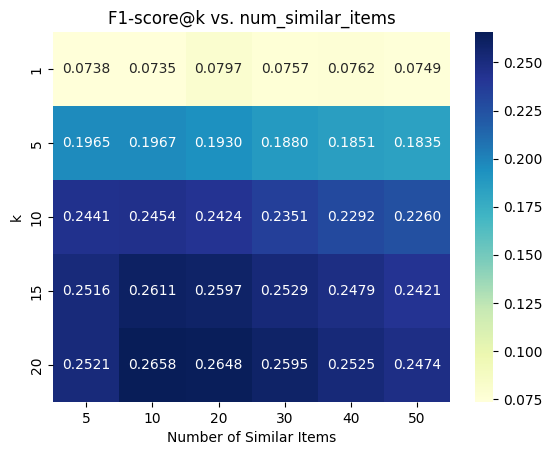

In [42]:
k_values = [1, 5, 10, 15, 20]
num_similar_items_values = [5, 10, 20, 30, 40, 50]

results_list = []

for k in k_values:
    for num_similar_items in num_similar_items_values:
        metrics = evaluate_metrics(test_data, item_similarity_df, item_user_ratings_train, k=k, num_similar_items=num_similar_items)
        results_list.append(metrics) 

results_df = pd.DataFrame(results_list)

# to see the F1-score as a heatmap:
import seaborn as sns
pivot_f1 = results_df.pivot_table(index='k', columns='num_similar_items', values='f1_score')
sns.heatmap(pivot_f1, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("F1-score@k vs. num_similar_items")
plt.xlabel("Number of Similar Items")
plt.ylabel("k")
plt.show()

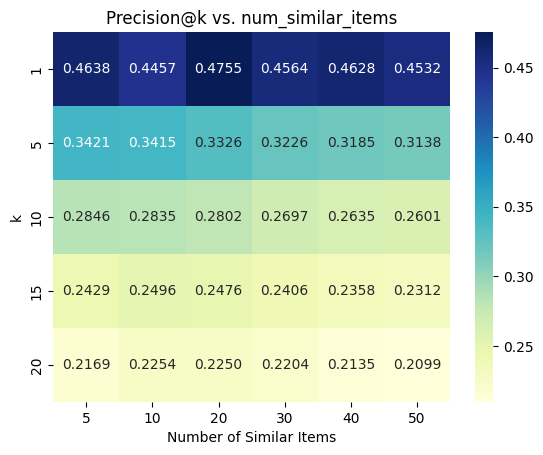

In [44]:
pivot_precision = results_df.pivot_table(index='k', columns='num_similar_items', values='precision')
sns.heatmap(pivot_precision, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Precision@k vs. num_similar_items")
plt.xlabel("Number of Similar Items")
plt.ylabel("k")
plt.show()

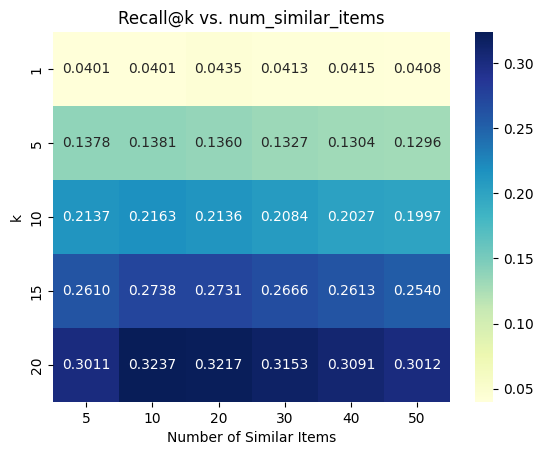

In [45]:
pivot_recall = results_df.pivot_table(index='k', columns='num_similar_items', values='recall')
sns.heatmap(pivot_recall, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Recall@k vs. num_similar_items")
plt.xlabel("Number of Similar Items")
plt.ylabel("k")
plt.show()

In [25]:
precision_at_1_item_based = evaluate_precision_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=1) 
print(f"\nAverage Precision@1 on the test set (Item based): {precision_at_1_item_based:.4f}")

precision_at_2_item_based = evaluate_precision_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=2) 
print(f"\nAverage Precision@2 on the test set (Item based): {precision_at_2_item_based:.4f}") 

precision_at_3_item_based = evaluate_precision_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=3) 
print(f"\nAverage Precision@3 on the test set (Item based): {precision_at_3_item_based:.4f}") 

precision_at_4_item_based = evaluate_precision_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=4) 
print(f"\nAverage Precision@4 on the test set (Item based): {precision_at_4_item_based:.4f}")  

precision_at_5_item_based = evaluate_precision_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=5) 
print(f"\nAverage Precision@5 on the test set (Item based): {precision_at_5_item_based:.4f}")

precision_at_10_item_based = evaluate_precision_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=10) 
print(f"\nAverage Precision@10 on the test set (Item based): {precision_at_10_item_based:.4f}")

precision_at_20_item_based = evaluate_precision_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=20) 
print(f"\nAverage Precision@20 on the test set (Item based): {precision_at_20_item_based:.4f}")


Average Precision@1 on the test set (Item based): 0.4755

Average Precision@2 on the test set (Item based): 0.4059

Average Precision@3 on the test set (Item based): 0.3730

Average Precision@4 on the test set (Item based): 0.3505

Average Precision@10 on the test set (Item based): 0.2802

Average Precision@20 on the test set (Item based): 0.2250


In [32]:
precision_at_1_item_based_5_similar = evaluate_precision_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=1, num_similar_items=5)
print(f"Average Precision@1 (with num_similar_items=5): {precision_at_1_item_based_5_similar:.4f}")

precision_at_2_item_based_5_similar = evaluate_precision_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=2, num_similar_items=5)
print(f"Average Precision@2 (with num_similar_items=5): {precision_at_2_item_based_5_similar:.4f}")

precision_at_3_item_based_5_similar = evaluate_precision_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=3, num_similar_items=5)
print(f"Average Precision@3 (with num_similar_items=5): {precision_at_3_item_based_5_similar:.4f}")

precision_at_4_item_based_5_similar = evaluate_precision_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=4, num_similar_items=5)
print(f"Average Precision@4 (with num_similar_items=5): {precision_at_4_item_based_5_similar:.4f}")

precision_at_5_item_based_5_similar = evaluate_precision_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=5, num_similar_items=5)
print(f"Average Precision@5 (with num_similar_items=5): {precision_at_5_item_based_5_similar:.4f}")

precision_at_10_item_based_5_similar = evaluate_precision_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=10, num_similar_items=5)
print(f"Average Precision@10 (with num_similar_items=5): {precision_at_10_item_based_5_similar:.4f}")

precision_at_20_item_based_5_similar = evaluate_precision_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=20, num_similar_items=5)
print(f"Average Precision@20 (with num_similar_items=5): {precision_at_20_item_based_5_similar:.4f}")

Average Precision@1 (with num_similar_items=5): 0.4638
Average Precision@2 (with num_similar_items=5): 0.4149
Average Precision@3 (with num_similar_items=5): 0.3816
Average Precision@4 (with num_similar_items=5): 0.3580
Average Precision@5 (with num_similar_items=5): 0.3421
Average Precision@10 (with num_similar_items=5): 0.2846
Average Precision@20 (with num_similar_items=5): 0.2169


In [34]:
recall_at_1_item_based_5_similar = evaluate_recall_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=1, num_similar_items=5)
print(f"Average Recall@1 (with num_similar_items=5): {recall_at_1_item_based_5_similar:.4f}")

recall_at_5_item_based_5_similar = evaluate_recall_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=5, num_similar_items=5)
print(f"Average Recall@5 (with num_similar_items=5): {recall_at_5_item_based_5_similar:.4f}") 

recall_at_10_item_based_5_similar = evaluate_recall_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=10, num_similar_items=5)
print(f"Average Recall@10 (with num_similar_items=5): {recall_at_10_item_based_5_similar:.4f}") 

recall_at_20_item_based_5_similar = evaluate_recall_at_item_k(test_data, item_similarity_df, item_user_ratings_train, k=20, num_similar_items=5)
print(f"Average Recall@20 (with num_similar_items=5): {recall_at_20_item_based_5_similar:.4f}")

Average Recall@1 (with num_similar_items=5): 0.0401
Average Recall@5 (with num_similar_items=5): 0.1378
Average Recall@10 (with num_similar_items=5): 0.2137
Average Recall@20 (with num_similar_items=5): 0.3011


In [44]:
def debug_evaluate_precision_at_k_item_based(user_id, test_data, user_similarity, item_user_ratings_train, k=5, num_similar_items=20): 
    """
    Debugs the item-based precision@k for a specific user.
    """
    print(f"Getting item-based recommendations for user ID: {user_id}")

    # Get movies rated by the user in the training data 
    user_ratings_train = item_user_ratings_train[user_id].dropna() 
    print(f"Number of movies rated by user {user_id} in training data: {len(user_ratings_train)}")

    # Get movies rated 3 or higher by the user in the test set 
    relevant_movies = test_data[(test_data['user_id'] == user_id) & (test_data['rating'] >= 3)]['movie_title'].tolist()
    print(f"\nDebugging User ID: {user_id}")
    print(f"Relevant movies in test set: {relevant_movies}")

    # Get item-based recommendations for the user
    movie_recommendations = get_item_based_recommendations(user_id, item_similarity_df, item_user_ratings_train, top_n=k, num_similar_items=num_similar_items)
    print(f"\nRecommended Movies (before check):\n{movie_recommendations}")

    if not movie_recommendations.empty: 
        recommendations_list = movie_recommendations.index.tolist() 
        hits = 0 

        # Calculate the number of movies in top k recommendations
        for movie in recommendations_list: 
            if movie in relevant_movies: 
                hits += 1

        # Calculate recision@k for the current user 
        precision = hits / k if k > 0 else 0
        return precision
    else: 
        print("No recommendations generated for this user")

In [46]:
debug_evaluate_precision_at_k_item_based(1, test_data, item_similarity_df, item_user_ratings_train, k=5, num_similar_items=50)

Getting item-based recommendations for user ID: 1
Number of movies rated by user 1 in training data: 207

Debugging User ID: 1
Relevant movies in test set: ['Basic Instinct (1992)', 'Raising Arizona (1987)', 'Fargo (1996)', 'Raging Bull (1980)', 'Return of the Jedi (1983)', 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', 'Reservoir Dogs (1992)', 'Contact (1997)', 'Crimson Tide (1995)', 'Net, The (1995)', 'Akira (1988)', "Bram Stoker's Dracula (1992)", 'Right Stuff, The (1983)', 'Breaking the Waves (1996)', 'Jurassic Park (1993)', 'Graduate, The (1967)', 'Long Kiss Goodnight, The (1996)', 'Hunt for Red October, The (1990)', '20,000 Leagues Under the Sea (1954)', 'Firm, The (1993)', 'Quiz Show (1994)', 'Brothers McMullen, The (1995)', 'Austin Powers: International Man of Mystery (1997)', 'Aladdin (1992)', 'Mirror Has Two Faces, The (1996)', 'While You Were Sleeping (1995)', 'Fish Called Wanda, A (1988)', 'Back to the Future (1985)', 'unknown', 'Platoon (1986)', 'Toy Story (1995)'